# Uber Data Analysis

## Importing the necessary libraries

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [118]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## EDA

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [120]:
df.shape

(1156, 7)

In [121]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [122]:
df["CATEGORY"].unique()

array(['Business', 'Personal', nan], dtype=object)

In [123]:
df["PURPOSE"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [124]:
df["START"].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

## Data Pre-Processing

### Handling the Null values <br>
As there are only 1 null values in each of the columns - END_DATE, CATEGORY, START, STOP; So dropping these datapoints won't affect our dataset. In case of the null values in the column PURPOSE we replace them by "Not Mentioned"

In [125]:
df1 = df.copy()

df1.dropna(subset=['END_DATE', 'CATEGORY', 'START', 'STOP'], inplace=True)

In [126]:
df1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [127]:
df1['PURPOSE'].fillna("Not Mentioned", inplace=True)

In [128]:
df1.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [129]:
df1.shape

(1155, 7)

### Converting START_DATE and END_DATE to datetime format

In [130]:
df2 = df1.copy()
df2['END_DATE'] = pd.to_datetime(df1['END_DATE'])
df2['START_DATE'] = pd.to_datetime(df1['START_DATE'])

In [131]:
df2.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Creating a new column "DURATION"

In [132]:
df2['DURATION'] = (df2['END_DATE'] - df2['START_DATE']).dt.total_seconds() / 3600
df2.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,0.200000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0.216667
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0.233333
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1.116667


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   DURATION    1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 81.2+ KB


## Graphical Analysis

### CATEGORY Analysis

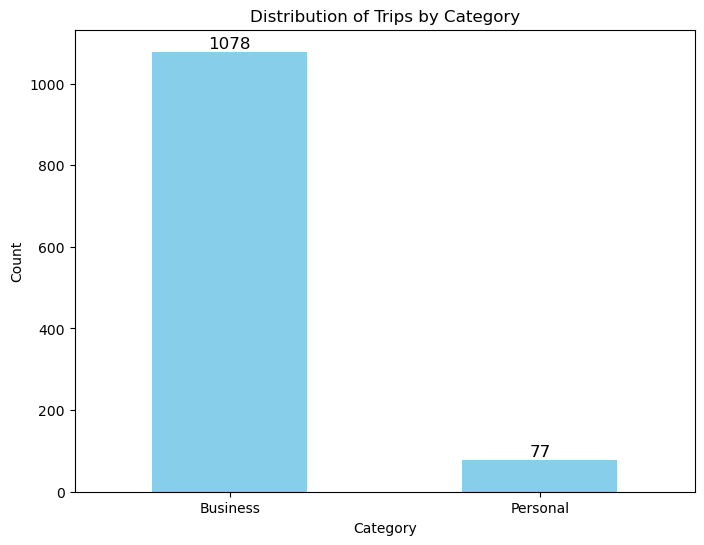

In [134]:
category_counts = df2['CATEGORY'].value_counts()
plt.figure(figsize=(8, 6))
ax = category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Trips by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, count in enumerate(category_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

<b>Observation :</b>
Most trips were taken for business purposes

### Start and Stop Location Analysis
We will be analysing the top 10 Start and Stop locations

In [135]:
top_locations = 10

Top 10 START locations -

In [136]:
start_counts = df2['START'].value_counts().head(top_locations)

Top 10 STOP location -

In [137]:
stop_counts = df2['STOP'].value_counts().head(top_locations)

<b>Visualisation-</b>

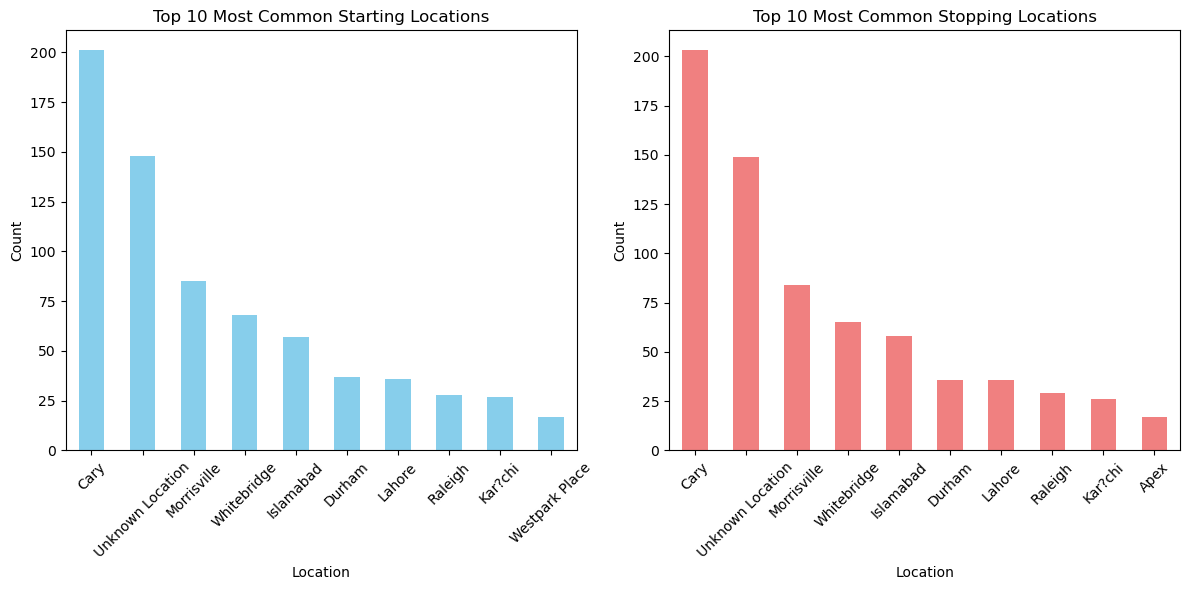

In [138]:
# Create a bar chart to visualize the most common starting locations
plt.figure(figsize=(12, 6))

# Plot the most common starting locations
plt.subplot(121)
start_counts.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_locations} Most Common Starting Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Create a bar chart to visualize the most common stopping locations
plt.subplot(122)
stop_counts.plot(kind='bar', color='lightcoral')
plt.title(f'Top {top_locations} Most Common Stopping Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<b>Observation-</b>
As both START and STOP contains a location as "Unknown Location" which is basically a null value, we want to remove those data points and so the visualisation again

In [139]:
df3 = df2[~((df2['START'] == "Unknown Location") | (df2['STOP'] == "Unknown Location"))]

In [140]:
df3.shape

(944, 8)

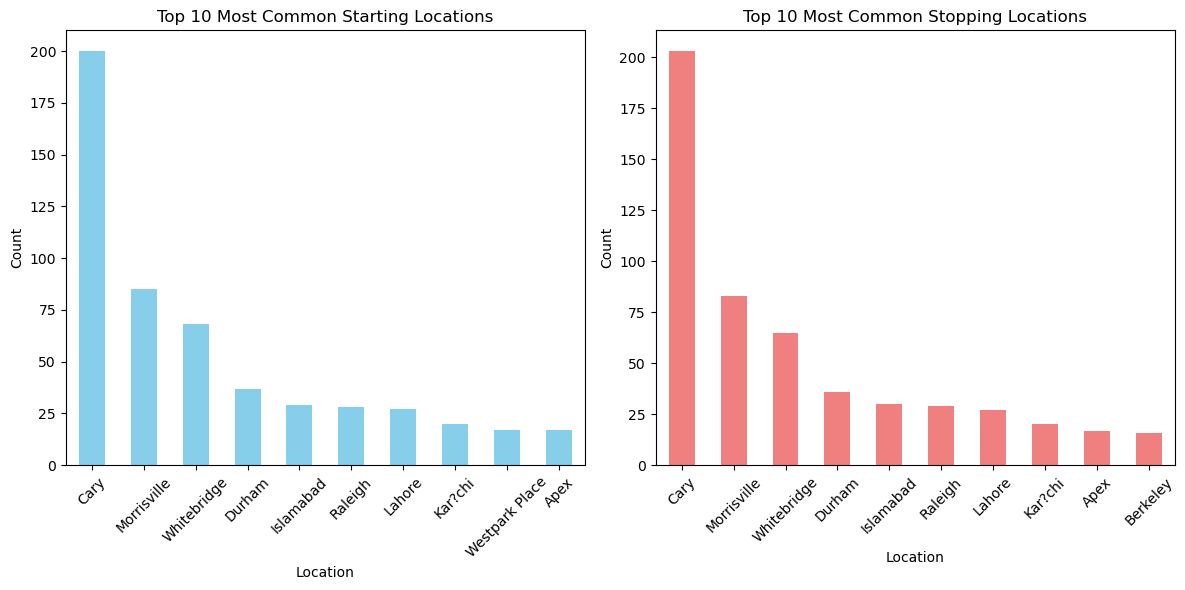

In [141]:
start_counts = df3['START'].value_counts().head(top_locations)
stop_counts = df3['STOP'].value_counts().head(top_locations)
plt.figure(figsize=(12, 6))
plt.subplot(121)
start_counts.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_locations} Most Common Starting Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Create a bar chart to visualize the most common stopping locations
plt.subplot(122)
stop_counts.plot(kind='bar', color='lightcoral')
plt.title(f'Top {top_locations} Most Common Stopping Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### MILES Analysis

<b>Calculate summary statistics for the 'MILES' column</b>

In [142]:
miles_summary = df3['MILES'].describe()
miles_summary

count    944.000000
mean       9.905297
std       21.472805
min        0.500000
25%        2.600000
50%        5.300000
75%        9.900000
max      310.300000
Name: MILES, dtype: float64

<b>Visualisation - </b>

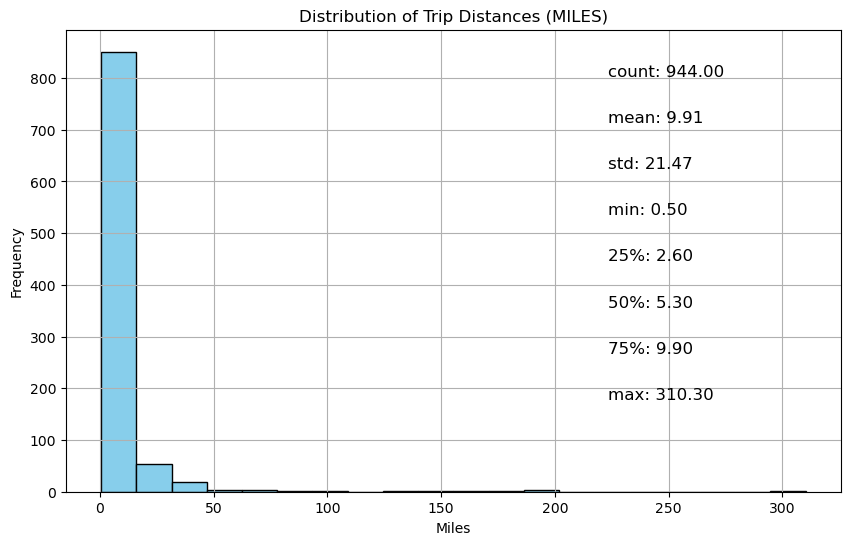

In [143]:
plt.figure(figsize=(10, 6))
plt.hist(df3['MILES'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Distances (MILES)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)

# Add statistics as text to the plot
for stat, value in miles_summary.items():
    plt.text(0.7, 0.9 - 0.1 * list(miles_summary.keys()).index(stat), f'{stat}: {value:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

### Analysis of the column PURPOSE

<b>Number of rides under each PURPOSE -</b>

In [144]:
purpose_counts = df3['PURPOSE'].value_counts()
purpose_counts

Not Mentioned      372
Meeting            164
Meal/Entertain     148
Errand/Supplies    111
Customer Visit      92
Temporary Site      32
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Airport/Travel       1
Name: PURPOSE, dtype: int64

<b>Visualisation</b>

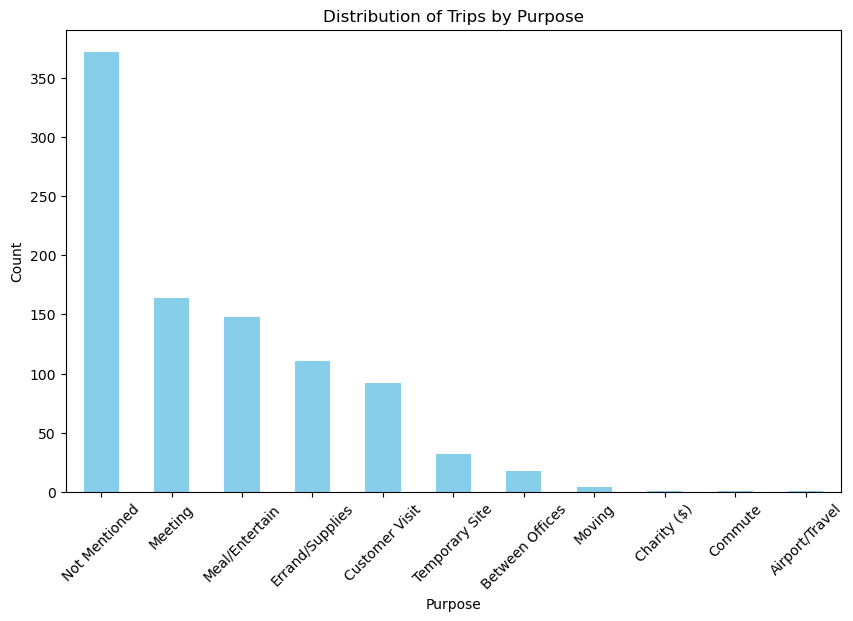

In [145]:
plt.figure(figsize=(10, 6))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Trips by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

<b>Calculate the average trip duration for each purpose</b>

In [146]:
average_duration_by_purpose = df3.groupby('PURPOSE')['DURATION'].mean()
average_duration_by_purpose

PURPOSE
Airport/Travel     0.250000
Between Offices    0.425000
Charity ($)        0.450000
Commute            3.083333
Customer Visit     0.572283
Errand/Supplies    0.209309
Meal/Entertain     0.257095
Meeting            0.456606
Moving             0.250000
Not Mentioned      0.313127
Temporary Site     0.411979
Name: DURATION, dtype: float64

<b>Visualisation</b>

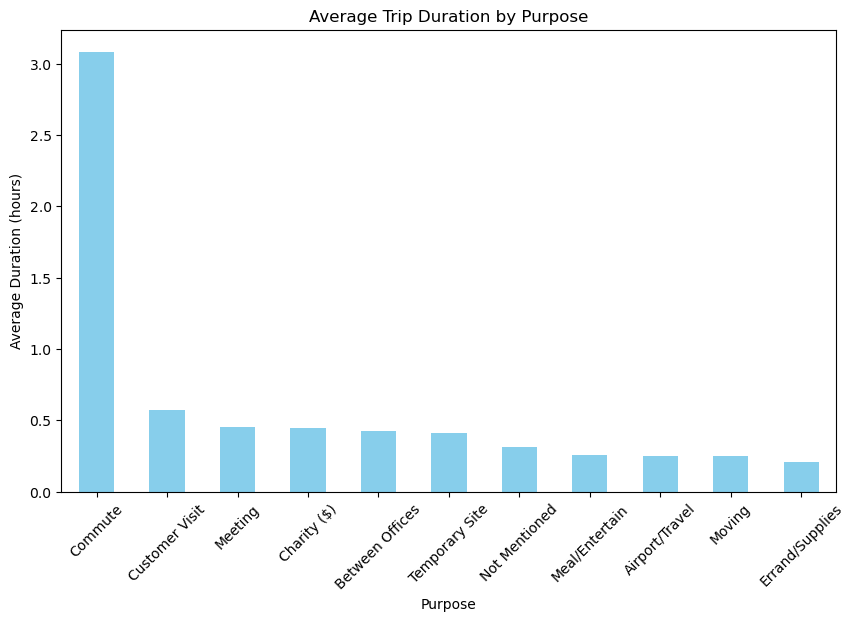

In [147]:
plt.figure(figsize=(10, 6))
average_duration_by_purpose.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)

plt.show()

### Analysis of DURATION

<b>Calculate summary statistics for the 'DURATION' column - </b>

In [148]:
duration_summary = df3['DURATION'].describe()
duration_summary

count    944.000000
mean       0.350547
std        0.399309
min        0.000000
25%        0.166667
50%        0.266667
75%        0.400000
max        5.500000
Name: DURATION, dtype: float64

<b>Visualisation</b>

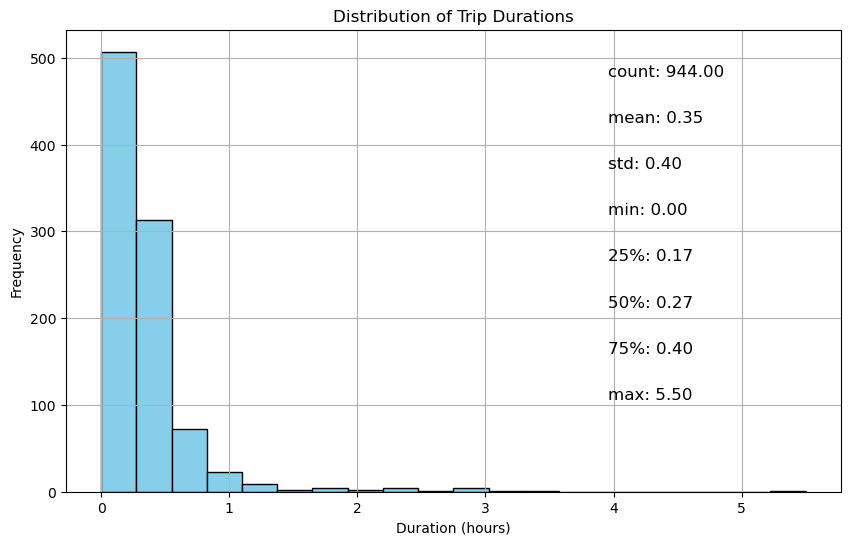

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(df3['DURATION'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)

# Add statistics as text to the plot
for stat, value in duration_summary.items():
    plt.text(0.7, 0.9 - 0.1 * list(duration_summary.keys()).index(stat), f'{stat}: {value:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

### Time based analysis

<b>Analysis by month</b>

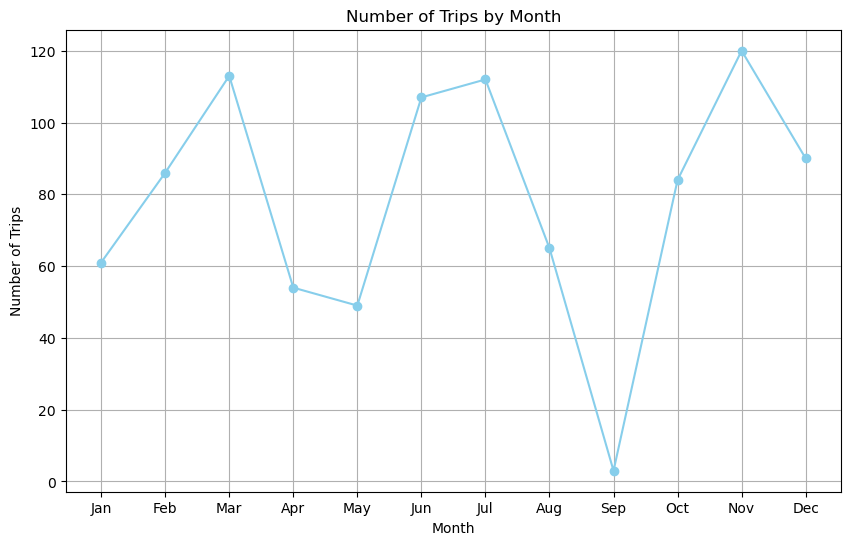

In [150]:
df3_month = df3.copy()

df3_month['Month'] = df3_month['START_DATE'].dt.month

trips_by_month = df3_month.groupby('Month')['START_DATE'].count()

plt.figure(figsize=(10, 6))
trips_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

<b>Analysis by days of the week</b>

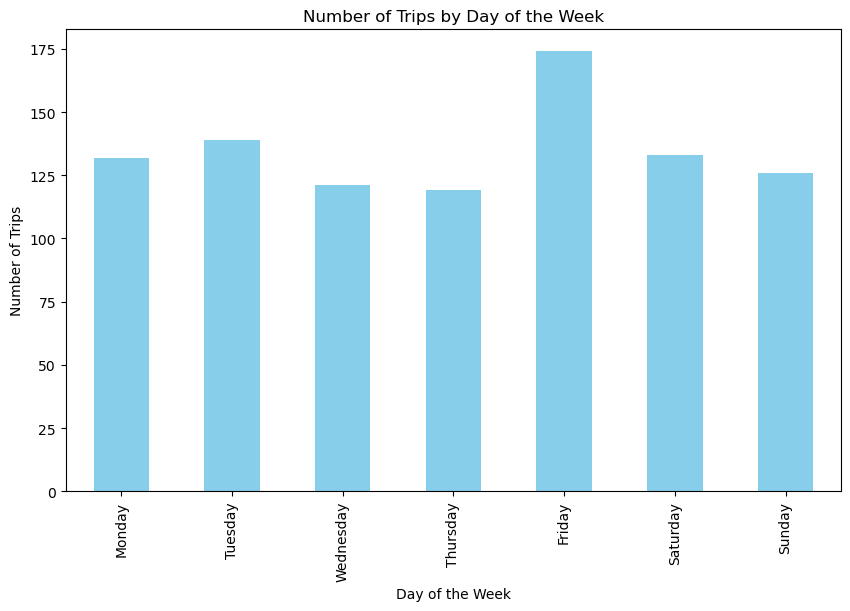

In [154]:
df3_week = df3.copy()

df3_week['DayOfWeek'] = df3_week['START_DATE'].dt.day_name()

trips_by_dayofweek = df3_week['DayOfWeek'].value_counts()

days_of_week_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]

plt.figure(figsize=(10, 6))
trips_by_dayofweek[days_of_week_order].plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')

plt.show()

<b>Analyze by Time of Day</b>

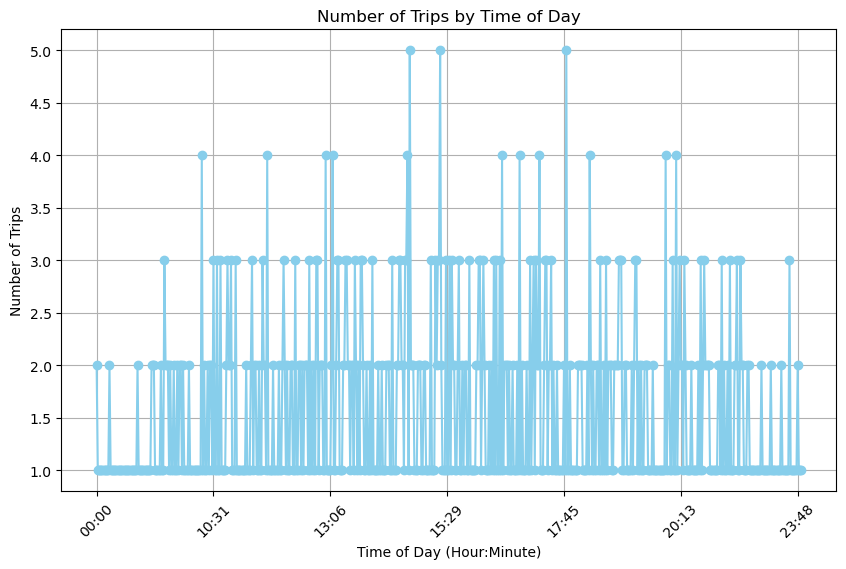

In [155]:
df3_time = df3.copy()

df3_time['TimeOfDay'] = df3_time['START_DATE'].dt.strftime('%H:%M')

trips_by_time = df3_time['TimeOfDay'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
trips_by_time.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Trips by Time of Day')
plt.xlabel('Time of Day (Hour:Minute)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()